In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [54]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/caroline_cochrane.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416053028046573569,1416053028046573568,2021-07-16 20:42:05 India Standard Time,2021-07-16,20:42:05,530,3929514799,ccochrane_nwt,Caroline Cochrane,,...,,,,,,[],,,,
1,1415772646067691520,1415772646067691520,2021-07-16 02:07:57 India Standard Time,2021-07-16,02:07:57,530,3929514799,ccochrane_nwt,Caroline Cochrane,,...,,,,,,[],,,,
2,1415722348834004994,1415722348834004992,2021-07-15 22:48:05 India Standard Time,2021-07-15,22:48:05,530,3929514799,ccochrane_nwt,Caroline Cochrane,,...,,,,,,[],,,,


In [55]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['With', 'restrictions', 'eased', 'on', 'indoor', 'gatherings,', 'the', 'Yellowknife', 'DMV', 'is', 'taking', 'walk-ins', 'again', 'between', 'noon', 'and', '4', 'p.m.', 'Mondays,', 'Tuesdays,', 'and', 'Thursdays.', 'The', 'DMV', 'continues', 'to', 'book', 'appointments', '–', 'click', 'the', 'link', 'below', 'for', 'more', 'information.', '#nwtpoli', '#nwt', '#yzf', 'https://t.co/RkYgwCXqvl', 'https://t.co/8ZpreqoApF', 'Partnership', 'with', 'the', 'Federal', 'Government', 'is', 'important', 'to', 'the', 'NWT’s', 'success.', 'It', 'was', 'a', 'pleasure', 'to', 'meet', 'with', '@stbstvdan', 'today', 'to', 'talk', 'about', 'post-pandemic', 'recovery,', 'food', 'insecurity,', 'and', 'supports', 'for', 'residential', 'school', 'survivors', 'and', 'families.', '#nwtpoli', '#cdnpoli', 'COVID-19', 'will', 'be', 'around', 'for', 'a', 'long', 'time', 'even', 'with', 'effective', 'vaccines.', 'We', 'must', 'continue', 'to', 'live', 'with', 'the', 'virus', 'and', 'adapt', 'to', 'a', 'new', 'norm

In [56]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [57]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['with',
 'restrict',
 'eas',
 'on',
 'indoor',
 'gather',
 'the',
 'yellowknif',
 'dmv',
 'is',
 'take',
 'walkin',
 'again',
 'between',
 'noon',
 'and',
 '4',
 'pm',
 'monday',
 'tuesday',
 'and',
 'thursday',
 'the',
 'dmv',
 'continu',
 'to',
 'book',
 'appoint',
 'click',
 'the',
 'link',
 'below',
 'for',
 'more',
 'inform',
 'nwtpoli',
 'nwt',
 'yzf',
 'httpstcorkygwcxqvl',
 'httpstco8zpreqoapf',
 'partnership',
 'with',
 'the',
 'feder',
 'govern',
 'is',
 'import',
 'to',
 'the',
 'nwts',
 'success',
 'it',
 'was',
 'a',
 'pleasur',
 'to',
 'meet',
 'with',
 'stbstvdan',
 'today',
 'to',
 'talk',
 'about',
 'postpandem',
 'recoveri',
 'food',
 'insecur',
 'and',
 'support',
 'for',
 'residenti',
 'school',
 'survivor',
 'and',
 'famili',
 'nwtpoli',
 'cdnpoli',
 'covid19',
 'will',
 'be',
 'around',
 'for',
 'a',
 'long',
 'time',
 'even',
 'with',
 'effect',
 'vaccin',
 'we',
 'must',
 'continu',
 'to',
 'live',
 'with',
 'the',
 'virus',
 'and',
 'adapt',
 'to',
 'a',
 'new

In [58]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['restrict',
 'eas',
 'indoor',
 'gather',
 'yellowknif',
 'dmv',
 'walkin',
 'noon',
 '4',
 'pm',
 'monday',
 'tuesday',
 'thursday',
 'dmv',
 'continu',
 'book',
 'appoint',
 'click',
 'link',
 'inform',
 'nwtpoli',
 'nwt',
 'yzf',
 'httpstcorkygwcxqvl',
 'httpstco8zpreqoapf',
 'partnership',
 'feder',
 'govern',
 'import',
 'nwts',
 'success',
 'pleasur',
 'meet',
 'stbstvdan',
 'today',
 'talk',
 'postpandem',
 'recoveri',
 'food',
 'insecur',
 'support',
 'residenti',
 'school',
 'survivor',
 'famili',
 'nwtpoli',
 'cdnpoli',
 'covid19',
 'long',
 'time',
 'effect',
 'vaccin',
 'continu',
 'live',
 'virus',
 'adapt',
 'new',
 'normal',
 'import',
 'stay',
 'inform',
 'best',
 'decis',
 'minim',
 'risk',
 'possibl',
 'nwtpoli',
 'nwt',
 'httpstcogcuzk76y4q',
 'httpstcog4h6paxdik',
 'friday',
 'offici',
 'open',
 'tch',
 'exhibit',
 'treati',
 '11',
 '100',
 'year',
 'place',
 'nrthrnheritag',
 'open',
 'public',
 'come',
 'learn',
 'centurylong',
 'stori',
 'treati',
 '11',
 'persp

In [59]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [60]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 629, 2: 171, 3: 80, 4: 46, 5: 40, 6: 21, 9: 14, 7: 14, 11: 10, 8: 9, ...})

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


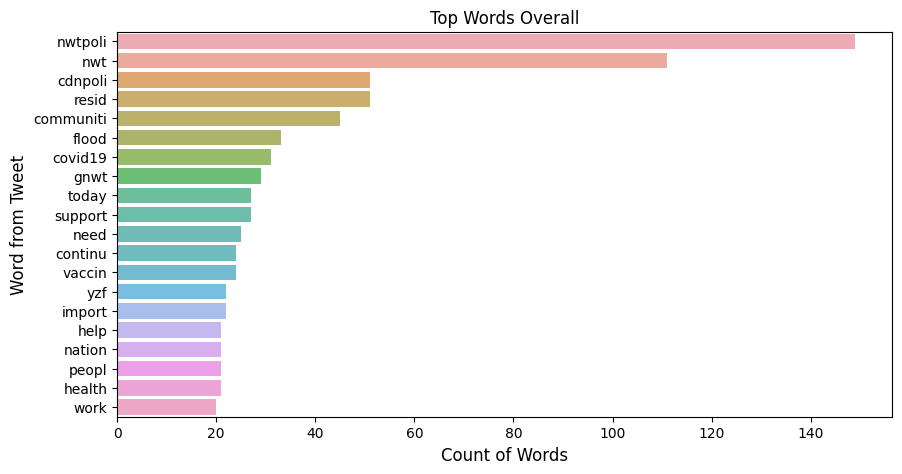

In [61]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [26]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [62]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


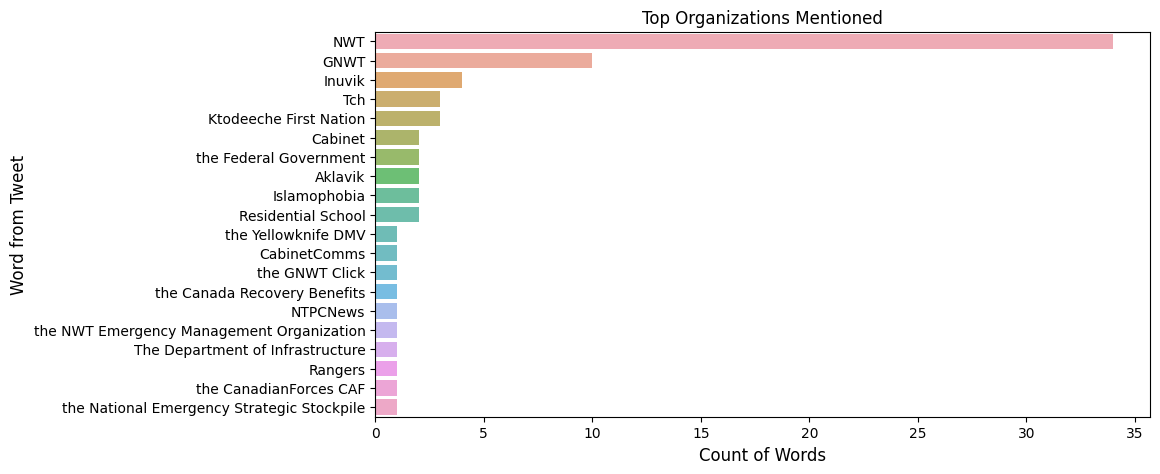

In [63]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [64]:
df.to_csv("cochrane_count.csv")